In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import gc

from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics import mean_squared_error
#from catboost import Pool, CatBoostRegressor
from xgboost import XGBRegressor
from itertools import combinations
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
#import optuna

plt.rcParams["figure.figsize"] = (20,15)

/Users/rodrigoassar/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install catboost

In [3]:
!pip install tqdm

In [4]:
train = pd.read_csv("train.csv")
og_feat = train.columns[1:-1]
test = pd.read_csv("test.csv")
sample_submission =pd.read_csv("sample_submission.csv")
print("Train:", train.shape)
print("Test:", test.shape)

Train: (300000, 26)
Test: (200000, 25)


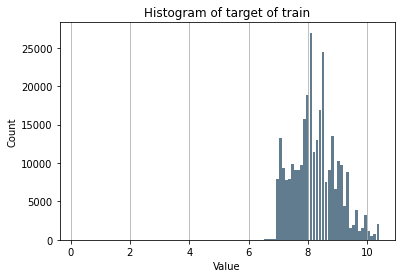

In [5]:
size, scale = 1000, 10
targets = pd.Series(train.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target of train')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [6]:
targets.describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

In [7]:
cota=8.191373

Facing it first as a classification problem, 1/True is high target class, ie. >=cota

In [8]:
train.targetclass=(train.target>cota)

In [9]:
train.targetclass.value_counts()

False    150000
True     150000
Name: target, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import xgboost as xgb
import numpy as np
import itertools

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier

In [11]:
nrows=train.shape[0]
ncols=train.shape[1]

In [12]:
ordinal_encoder = OrdinalEncoder()
useful_features = [c for c in train.columns if c not in ("id", "target")]
object_cols = [col for col in useful_features if 'cat' in col]
test = test[useful_features]

Training split into train and test.... features and targetclass

In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(train.iloc[range(0,nrows),range(0,ncols-1)],train.targetclass,test_size=0.25)


In [14]:
train_labels.value_counts()

True     112633
False    112367
Name: target, dtype: int64

In [15]:
test_labels.value_counts()

False    37633
True     37367
Name: target, dtype: int64

In [16]:
train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

1) From targetclass predicted for each model we considered the fourth possible combinations (high,low),(high,high),(low,high),(low,low) and at each pair of predictions WE ASSIGN AN UNIQUE TARGET VALUE BEING THE MEDIAN OVER THE INTERNAL TEST (SUBSTRACTED FROM TRAIN)

Random Forest for targetclass classification

In [17]:
train_features = train_features[useful_features]
test_features = test_features[useful_features]
train_features[object_cols] = ordinal_encoder.fit_transform(train_features[object_cols])
#xvalid[object_cols] = ordinal_encoder.transform(xvalid[object_cols])
test_features[object_cols] = ordinal_encoder.transform(test_features[object_cols])

In [246]:
TRAIN_features=train[useful_features]
TRAIN_features[object_cols]=ordinal_encoder.transform(TRAIN_features[object_cols])
TRAIN_features.describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.356233,0.483920,0.153713,1.800953,0.999400,1.894157,0.040960,3.897103,2.396427,7.382510,...,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273
std,0.478886,0.499742,0.360674,0.632288,0.150576,0.981864,0.280504,0.567165,1.835474,3.419299,...,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,0.000000,5.000000,...,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669
50%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,8.000000,...,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400
75%,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,10.000000,...,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447
max,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.000000,7.000000,6.000000,14.000000,...,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992


In [18]:
train_features.describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,...,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000,225000.000000
mean,0.355822,0.483440,0.153502,1.801204,0.999596,1.892898,0.041080,3.896973,2.395458,7.379413,...,0.491239,0.510268,0.467646,0.536895,0.498395,0.474872,0.474658,0.473091,0.494317,0.508447
std,0.478763,0.499727,0.360472,0.632636,0.151364,0.982084,0.282397,0.567596,1.834567,3.422472,...,0.239852,0.228373,0.210227,0.218252,0.239970,0.218079,0.255905,0.222171,0.247420,0.222985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255908,0.045915,-0.224689,0.203771,-0.260275,0.117896,0.048732,0.052612,-0.074206,0.151050
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,0.000000,5.000000,...,0.284184,0.353836,0.342888,0.355435,0.332356,0.306609,0.276954,0.307830,0.288934,0.300697
50%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,8.000000,...,0.388748,0.488748,0.429552,0.504489,0.438960,0.434844,0.459987,0.433830,0.422523,0.472490
75%,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,10.000000,...,0.695654,0.669830,0.573376,0.703279,0.606120,0.614429,0.691730,0.641768,0.714521,0.758523
max,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.000000,7.000000,6.000000,14.000000,...,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055940,1.071444,0.975035,0.905992


In [20]:
testOUT_features = test[useful_features]
testOUT_features[object_cols] = ordinal_encoder.transform(testOUT_features[object_cols])


In [21]:
train.target[train.targetclass].describe()

count    150000.000000
mean          8.832534
std           0.494348
min           8.191374
25%           8.459245
50%           8.728637
75%           9.095079
max          10.411992
Name: target, dtype: float64

In [22]:
train.target[train.targetclass==False].describe()

count    150000.000000
mean          7.651423
std           0.415687
min           0.140329
25%           7.308693
50%           7.742069
75%           8.015701
max           8.191372
Name: target, dtype: float64

Combining models RF and XGB

In [23]:
test_target=train.target[test_labels.index]

In [24]:
test_target1=test_target[test_labels==True]
test_target1.describe()

count    37367.000000
mean         8.832736
std          0.495674
min          8.191386
25%          8.457175
50%          8.729389
75%          9.095444
max         10.411820
Name: target, dtype: float64

In [25]:
test_target0=test_target[test_labels==False]
test_target0.describe()

count    37633.000000
mean         7.648251
std          0.419591
min          0.483314
25%          7.301103
50%          7.737761
75%          8.015728
max          8.191328
Name: target, dtype: float64

XGB with hyperparameters

In [26]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [42]:
parameters = {
    'max_depth': range (4, 8, 2),
    'n_estimators': range(100, 200, 100),
    'learning_rate': [0.1, 0.3],
    'colsample_bynode': [0.6, 1],
    'colsample_bytree': [0.6, 1]
}

In [43]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [44]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 4,
    verbose=True
)

In [ ]:
grid_search.fit(train_features,train_labels)

In [162]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.6, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
Bstxgb = XGBClassifier(learning_rate=0.1,colsample_bynode=0.6, colsample_bytree=0.6,max_depth=4,n_estimators=200)
Bstxgb.fit(train_features,train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=0.6, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
test_xgbpredlabelsBst = Bstxgb.predict(test_features)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

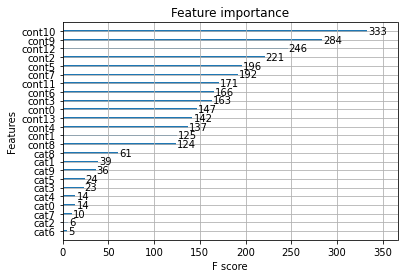

In [87]:
xgb.plot_importance(Bstxgb)

In [88]:
print("Accuracy:",np.sqrt(metrics.accuracy_score(test_labels, test_xgbpredlabelsBst)))

Accuracy: 0.7522410961032816


In [89]:
test_predtargetclassXGBBst=Bstxgb.predict(testOUT_features)

RF with adjustement

In [90]:
estimatorRF = RandomForestClassifier(
)


In [198]:
parametersRF = {
    'max_depth': range (4, 8, 2),
    'n_estimators': range(100, 500, 100),
    'min_samples_split': [0.0001, 0.001, 0.01],
    'criterion': ["gini", "entropy"],
    'max_features': ["sqrt","log2"]
}

In [199]:
grid_searchRF = GridSearchCV(
    estimator=estimatorRF,
    param_grid=parametersRF,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 4,
    verbose=True
)

In [200]:
grid_searchRF.fit(train_features,train_labels)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 8, 2),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [0.0001, 0.001, 0.01],
                         'n_estimators': range(100, 500, 100)},
             scoring='roc_auc', verbose=True)

In [201]:
grid_searchRF.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2',
                       min_samples_split=0.001, n_estimators=400)

In [91]:
rfBst=RandomForestClassifier(max_depth=6, max_features='log2',min_samples_split=0.001, n_estimators=400)

In [92]:
rfBst.fit(train_features,train_labels)

RandomForestClassifier(max_depth=6, max_features='log2',
                       min_samples_split=0.001, n_estimators=400)

In [93]:
test_rfpredlabelsBst = rfBst.predict(test_features)

No handles with labels found to put in legend.


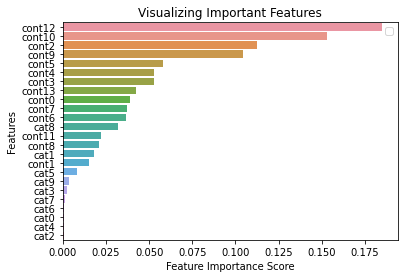

In [94]:
features_imprf=pd.Series(rfBst.feature_importances_,index=train_features.columns).sort_values(ascending=False)
sns.barplot(x=features_imprf, y=features_imprf.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [95]:
test_predlabelsrfBst=rfBst.predict(test_features)
from sklearn import metrics
print("Accuracy:",np.sqrt(metrics.accuracy_score(test_labels, test_predlabelsrfBst)))

Accuracy: 0.7419793348425098


In [96]:
test_predtargetclassRFBst=rfBst.predict(testOUT_features)

In [97]:
confusion_matrix(test_predtargetclassRFBst,test_predtargetclassXGBBst)

array([[74086, 16324],
       [23200, 86390]])

In [98]:
train.target[train.targetclass].describe()

count    150000.000000
mean          8.832534
std           0.494348
min           8.191374
25%           8.459245
50%           8.728637
75%           9.095079
max          10.411992
Name: target, dtype: float64

In [99]:
train.target[train.targetclass==False].describe()

count    150000.000000
mean          7.651423
std           0.415687
min           0.140329
25%           7.308693
50%           7.742069
75%           8.015701
max           8.191372
Name: target, dtype: float64

In [100]:
test_labels[test_xgbpredlabelsBst].describe()

count     38539
unique        2
top        True
freq      21673
Name: target, dtype: object

In [101]:
test_target=train.target[test_labels.index]

Combinations of targetclass values predicted by XGB and RF

In [102]:
set1=pd.Series(test_xgbpredlabelsBst)
set2=pd.Series(test_predlabelsrfBst)
both1=np.array((set1.astype(int)+set2.astype(int))==2)
both1
both0=np.array((set1.astype(int)+set2.astype(int))==0)

In [247]:
TRAIN_predtargetclassXGBBst=Bstxgb.predict(TRAIN_features)
TRAIN_predtargetclassRFBst=rfBst.predict(TRAIN_features)

In [248]:
Tset1=pd.Series(TRAIN_predtargetclassXGBBst)
Tset2=pd.Series(TRAIN_predtargetclassRFBst)
Tboth1=np.array((Tset1.astype(int)+Tset2.astype(int))==2)
Tboth1
Tboth0=np.array((Tset1.astype(int)+Tset2.astype(int))==0)

In [103]:
test_targetxgbyrfpred1=test_target[both1==True]
test_targetxgbyrfpred1.describe()

count    32546.000000
mean         8.380112
std          0.720637
min          2.802538
25%          7.943391
50%          8.367452
75%          8.836828
max         10.411820
Name: target, dtype: float64

In [249]:
TRAIN_targetxgbyrfpred1=train.target[Tboth1==True]
TRAIN_targetxgbyrfpred0=train.target[Tboth0==True]
TRAIN_targetxgbyrfpred1.describe()


count    130044.000000
mean          8.399878
std           0.719692
min           2.802538
25%           7.959871
50%           8.394292
75%           8.843973
max          10.411992
Name: target, dtype: float64

In [104]:
test_targetxgbyrfpred0=test_target[both0==True]
test_targetxgbyrfpred0.describe()

count    27756.000000
mean         8.076251
std          0.748700
min          0.911752
25%          7.491302
50%          8.058915
75%          8.508045
max         10.411593
Name: target, dtype: float64

In [250]:
TRAIN_targetxgbyrfpred0=train.target[Tboth0==True]
TRAIN_targetxgbyrfpred0.describe()

count    111019.000000
mean          8.065768
std           0.740592
min           0.140329
25%           7.489117
50%           8.045543
75%           8.503146
max          10.411781
Name: target, dtype: float64

In [105]:
xgb0rf1=np.array((set1.astype(int)+set2.astype(int))*set2.astype(int)==1)
test_targetxgb0rf1=test_target[xgb0rf1==True]
test_targetxgb0rf1.describe()

count    8705.000000
mean        8.154917
std         0.755732
min         3.815746
25%         7.579989
50%         8.107260
75%         8.612815
max        10.411566
Name: target, dtype: float64

In [251]:
Txgb0rf1=np.array((Tset1.astype(int)+Tset2.astype(int))*Tset2.astype(int)==1)
TRAIN_targetxgb0rf1=train.target[Txgb0rf1==True]
Txgb1rf0=np.array((Tset2.astype(int)+Tset1.astype(int))*Tset1.astype(int)==1)
TRAIN_targetxgb1rf0=train.target[Txgb1rf0==True]
TRAIN_targetxgb0rf1.describe()

count    34729.000000
mean         8.132840
std          0.742582
min          1.822224
25%          7.570992
50%          8.090985
75%          8.567706
max         10.411566
Name: target, dtype: float64

In [106]:
xgb1rf0=np.array((set2.astype(int)+set1.astype(int))*set1.astype(int)==1)
test_targetxgb1rf0=test_target[xgb1rf0==True]
test_targetxgb1rf0.describe()

count    5993.000000
mean        8.340961
std         0.727856
min         0.483314
25%         7.908267
50%         8.298650
75%         8.815191
max        10.411530
Name: target, dtype: float64

In [107]:
Set1=pd.Series(test_predtargetclassXGBBst)
Set2=pd.Series(test_predtargetclassRFBst)
Both1=np.array((Set1.astype(int)+Set2.astype(int))==2)
Both0=np.array((Set1.astype(int)+Set2.astype(int))==0)
Xgb0rf1=np.array((Set1.astype(int)+Set2.astype(int))*Set2.astype(int)==1)
Xgb1rf0=np.array((Set2.astype(int)+Set1.astype(int))*Set1.astype(int)==1)


Model with XGBst at each one of the 4 leaves of combined classifiers

In [108]:
test_varsytarget=train.loc[test_labels.index,:]

In [109]:
test_varsytarget.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

In [110]:
cota

8.191373

In [111]:
sample_submission =pd.read_csv("sample_submission.csv")
submissionCombRegressor=sample_submission

xgb=1,rf=1

In [112]:
test_varsytargetboth1=test_varsytarget[both1==True]
test_varsytargetboth1[object_cols] = ordinal_encoder.transform(test_varsytargetboth1[object_cols])
train_featuresboth1, test_featuresboth1, train_labelsboth1, test_labelsboth1 = train_test_split(test_varsytargetboth1.loc[:,useful_features],test_varsytargetboth1.target,test_size=0.25)



In [113]:
train_featuresboth1.describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,...,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000,24409.000000
mean,0.356713,0.450776,0.162235,1.776804,0.999099,1.815847,0.042279,3.915851,2.393666,7.355525,...,0.478377,0.473211,0.439849,0.532316,0.477911,0.427259,0.508211,0.471636,0.528452,0.476378
std,0.479039,0.497581,0.368674,0.663093,0.163938,0.967161,0.279178,0.528566,1.677695,3.412018,...,0.236059,0.216055,0.214114,0.209507,0.224040,0.190272,0.242509,0.218816,0.215000,0.218234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.255998,0.045930,-0.224590,0.203820,-0.259786,0.117896,0.048765,0.052608,-0.074048,0.151069
25%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,5.000000,...,0.280254,0.336447,0.324360,0.363094,0.332665,0.289443,0.318431,0.311593,0.363673,0.285016
50%,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,8.000000,...,0.330794,0.427387,0.406693,0.500572,0.428296,0.417816,0.494705,0.433393,0.489472,0.441666
75%,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,4.000000,4.000000,10.000000,...,0.684801,0.614205,0.551011,0.668990,0.586381,0.525940,0.705511,0.639578,0.709882,0.637005
max,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,7.000000,7.000000,6.000000,14.000000,...,1.055270,1.067609,1.110781,1.032739,1.040145,0.981372,1.055960,1.071427,0.975032,0.905989


In [114]:
test_labelsboth1.describe()

count    8137.000000
mean        8.380644
std         0.717057
min         5.048884
25%         7.947753
50%         8.371885
75%         8.834134
max        10.411741
Name: target, dtype: float64

In [115]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.05344238585504369,
             'colsample_bytree': 0.182752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}

In [116]:
xgbyrf1regressor=XGBRegressor(**xgb_params,random_state=0)

In [117]:
xgbyrf1regressor.fit(train_featuresboth1,train_labelsboth1,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresboth1, test_labelsboth1)])


[0]	validation_0-rmse:7.49423
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.09750
[2]	validation_0-rmse:6.72229
[3]	validation_0-rmse:6.36745
[4]	validation_0-rmse:6.03162
[5]	validation_0-rmse:5.71394
[6]	validation_0-rmse:5.41366
[7]	validation_0-rmse:5.12943
[8]	validation_0-rmse:4.86106
[9]	validation_0-rmse:4.60690
[10]	validation_0-rmse:4.36653
[11]	validation_0-rmse:4.14008
[12]	validation_0-rmse:3.92557
[13]	validation_0-rmse:3.72295
[14]	validation_0-rmse:3.53179
[15]	validation_0-rmse:3.35086
[16]	validation_0-rmse:3.18020
[17]	validation_0-rmse:3.01914
[18]	validation_0-rmse:2.86760
[19]	validation_0-rmse:2.72419
[20]	validation_0-rmse:2.58940
[21]	validation_0-rmse:2.46236
[22]	validation_0-rmse:2.34250
[23]	validation_0-rmse:2.22915
[24]	validation_0-rmse:2.12295
[25]	validation_0-rmse:2.02302
[26]	validation_0-rmse:1.92870
[27]	validation_0-rmse:1.83989
[28]	validation_0-rmse:1.75636
[29]	validation_0-rmse:1.67852
[30]	validati

XGBRegressor(alpha=0.31497378201113674, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.182752418577295, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.08413322850225624, learning_rate=0.05344238585504369,
             max_delta_step=0, max_depth=2, min_child_weight=148.2986978620488,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.314973772, reg_lambda=0.0841332301, scale_pos_weight=1,
             subsample=0.5105633202654916, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [118]:
submissionCombRegressor.target[Both1]=xgbyrf1regressor.predict(testOUT_features[Both1],ntree_limit = xgbyrf1regressor.get_booster().best_ntree_limit)
#predict no es en todo testOUT_features

In [252]:
train.predtarget=train.target


In [265]:
train.predtarget[Tboth1]=xgbyrf1regressor.predict(TRAIN_features[Tboth1],ntree_limit = xgbyrf1regressor.get_booster().best_ntree_limit)


In [119]:
estimatorxgb1rf1 = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)
parametersxgb1rf1 = {
    'alpha': [0.31497,0.63],
    'max_depth': [2,4],
    'n_estimators': [1000,1500],
    'learning_rate': [0.05344,0.09],
    'colsample_bynode': [0.5, 1],
    'colsample_bytree': [0.1827, 0.33],
    'lambda': [0.08, 0.16]
}
grid_search = GridSearchCV(
    estimator=estimatorxgb1rf1,
    param_grid=parametersxgb1rf1,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 2,
    verbose=True
)
grid_search.fit(train_featuresboth1,train_labelsboth1)
grid_search.best_estimator_

Fitting 2 folds for each of 128 candidates, totalling 256 fits


KeyboardInterrupt: 

In [ ]:
xgb_paramsbest = {'objective': 'reg:squarederror',
             'n_estimators': 8000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.05344,
             'colsample_bytree': 0.1827,
                 'lambda': 0.08,
                  'alpha': 0.31497,
                 'colsample_bynode': 0.5}
xgb1rf1regressorbest=XGBRegressor(**xgb_paramsbest,random_state=42)
xgb1rf1regressorbest.fit(train_featuresboth1,train_labelsboth1,eval_metric="rmse",early_stopping_rounds=200,eval_set=[(test_featuresboth1, test_labelsboth1)])


I used the previuos, better THAN WITH HYPERPARAMETER ADJUSTING

xgb=0,rf=0

In [120]:
test_varsytargetboth0=test_varsytarget[both0==True]
test_varsytargetboth0[object_cols] = ordinal_encoder.transform(test_varsytargetboth0[object_cols])
train_featuresboth0, test_featuresboth0, train_labelsboth0, test_labelsboth0 = train_test_split(test_varsytargetboth0.loc[:,useful_features],test_varsytargetboth0.target,test_size=0.25)



In [121]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.01344238585504369,
             'colsample_bytree': 0.182752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}

In [122]:
xgbyrf0regressor=XGBRegressor(**xgb_params,random_state=0)

In [ ]:
xgbyrf0regressor.fit(train_featuresboth0,train_labelsboth0,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresboth0, test_labelsboth0)])


[0]	validation_0-rmse:7.51103
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.41114
[2]	validation_0-rmse:7.31251
[3]	validation_0-rmse:7.21519
[4]	validation_0-rmse:7.11917
[5]	validation_0-rmse:7.02454
[6]	validation_0-rmse:6.93118
[7]	validation_0-rmse:6.83913
[8]	validation_0-rmse:6.74831
[9]	validation_0-rmse:6.65862
[10]	validation_0-rmse:6.57029
[11]	validation_0-rmse:6.48308
[12]	validation_0-rmse:6.39707
[13]	validation_0-rmse:6.31219
[14]	validation_0-rmse:6.22851
[15]	validation_0-rmse:6.14602
[16]	validation_0-rmse:6.06459
[17]	validation_0-rmse:5.98411
[18]	validation_0-rmse:5.90496
[19]	validation_0-rmse:5.82684
[20]	validation_0-rmse:5.74976
[21]	validation_0-rmse:5.67384
[22]	validation_0-rmse:5.59905
[23]	validation_0-rmse:5.52509
[24]	validation_0-rmse:5.45216
[25]	validation_0-rmse:5.38023
[26]	validation_0-rmse:5.30945
[27]	validation_0-rmse:5.23947
[28]	validation_0-rmse:5.17049
[29]	validation_0-rmse:5.10235
[30]	validati

In [124]:
xgbyrf0regressor.get_booster().best_ntree_limit

9597

In [125]:
submissionCombRegressor.target[Both0]=xgbyrf0regressor.predict(testOUT_features[Both0],ntree_limit = xgbyrf0regressor.get_booster().best_ntree_limit)


In [264]:
train.predtarget[Tboth0]=xgbyrf0regressor.predict(TRAIN_features[Tboth0],ntree_limit = xgbyrf0regressor.get_booster().best_ntree_limit)

In [ ]:
#Hyperparameter adjusting

In [552]:
estimatorxgb0rf0 = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)
parametersxgb0rf0 = {
    'alpha': [0.315,0.63],
    'n_estimators': [1000,1500],
    'learning_rate': [0.007,0.07],
    'colsample_bynode': [0.02, 0.06],
    'colsample_bytree': [0.02, 0.06],
    'lambda': [0.08, 0.8]
}
grid_search = GridSearchCV(
    estimator=estimatorxgb0rf0,
    param_grid=parametersxgb0rf0,
    scoring = 'roc_auc',
    n_jobs = 2,
    cv = 2,
    verbose=True
)
grid_search.fit(train_featuresboth0,train_labelsboth0)
grid_search.best_estimator_


Fitting 2 folds for each of 64 candidates, totalling 128 fits


XGBRegressor(alpha=0.315, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.02, colsample_bytree=0.02, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=0.08,
             learning_rate=0.007, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0.314999998, reg_lambda=0.0799999982,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [126]:
xgb_paramsbest = {'objective': 'reg:squarederror',
             'n_estimators': 45000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.013,
             'colsample_bytree': 0.33,
                 'lambda': 0.08,
                  'alpha': 0.315}
xgb0rf0regressorbest=XGBRegressor(**xgb_paramsbest,random_state=42)
xgb0rf0regressorbest.fit(train_featuresboth0,train_labelsboth0,eval_metric="rmse",early_stopping_rounds=500,eval_set=[(test_featuresboth0, test_labelsboth0)])


[0]	validation_0-rmse:7.51434
Will train until validation_0-rmse hasn't improved in 500 rounds.
[1]	validation_0-rmse:7.41762
[2]	validation_0-rmse:7.32218
[3]	validation_0-rmse:7.22799
[4]	validation_0-rmse:7.13503
[5]	validation_0-rmse:7.04328
[6]	validation_0-rmse:6.95276
[7]	validation_0-rmse:6.86342
[8]	validation_0-rmse:6.77527
[9]	validation_0-rmse:6.68827
[10]	validation_0-rmse:6.60241
[11]	validation_0-rmse:6.51769
[12]	validation_0-rmse:6.43407
[13]	validation_0-rmse:6.35154
[14]	validation_0-rmse:6.27011
[15]	validation_0-rmse:6.18977
[16]	validation_0-rmse:6.11046
[17]	validation_0-rmse:6.03222
[18]	validation_0-rmse:5.95499
[19]	validation_0-rmse:5.87880
[20]	validation_0-rmse:5.80361
[21]	validation_0-rmse:5.72942
[22]	validation_0-rmse:5.65621
[23]	validation_0-rmse:5.58396
[24]	validation_0-rmse:5.51267
[25]	validation_0-rmse:5.44230
[26]	validation_0-rmse:5.37290
[27]	validation_0-rmse:5.30439
[28]	validation_0-rmse:5.23682
[29]	validation_0-rmse:5.17013
[30]	validatio

XGBRegressor(alpha=0.315, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.33, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='', lambda=0.08,
             learning_rate=0.013, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=45000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.314999998, reg_lambda=0.0799999982, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

Better without adjustement

xgb=1,rf=0

In [127]:
test_varsytargetXgb1rf0=test_varsytarget[xgb1rf0==True]
test_varsytargetXgb1rf0[object_cols] = ordinal_encoder.transform(test_varsytargetXgb1rf0[object_cols])
train_featuresXgb1rf0, test_featuresXgb1rf0, train_labelsXgb1rf0, test_labelsXgb1rf0 = train_test_split(test_varsytargetXgb1rf0.loc[:,useful_features],test_varsytargetXgb1rf0.target,test_size=0.25)


In [146]:
xgb_params = {'objective': 'reg:squarederror',
             'n_estimators': 20000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.007344238585504369,
             'colsample_bytree': 0.102752418577295,
             'subsample': 0.5105633202654916,
             'alpha': 0.31497378201113674,
             'lambda': 0.08413322850225624,
             'min_child_weight': 148.2986978620488}
#xgb1rf0regressor=XGBRegressor(**xgb_params,random_state=0)

In [147]:
xgb1rf0regressor=XGBRegressor(**xgb_params,random_state=0)

In [148]:
xgb1rf0regressor.fit(train_featuresXgb1rf0,train_labelsXgb1rf0,eval_metric="rmse",early_stopping_rounds=1000,eval_set=[(test_featuresXgb1rf0, test_labelsXgb1rf0)])


[0]	validation_0-rmse:7.79294
Will train until validation_0-rmse hasn't improved in 1000 rounds.
[1]	validation_0-rmse:7.73604
[2]	validation_0-rmse:7.67954
[3]	validation_0-rmse:7.62334
[4]	validation_0-rmse:7.56757
[5]	validation_0-rmse:7.51225
[6]	validation_0-rmse:7.45737
[7]	validation_0-rmse:7.40280
[8]	validation_0-rmse:7.34872
[9]	validation_0-rmse:7.29505
[10]	validation_0-rmse:7.24177
[11]	validation_0-rmse:7.18888
[12]	validation_0-rmse:7.13635
[13]	validation_0-rmse:7.08401
[14]	validation_0-rmse:7.03233
[15]	validation_0-rmse:6.98108
[16]	validation_0-rmse:6.92998
[17]	validation_0-rmse:6.87935
[18]	validation_0-rmse:6.82908
[19]	validation_0-rmse:6.77923
[20]	validation_0-rmse:6.72975
[21]	validation_0-rmse:6.68072
[22]	validation_0-rmse:6.63201
[23]	validation_0-rmse:6.58360
[24]	validation_0-rmse:6.53575
[25]	validation_0-rmse:6.48811
[26]	validation_0-rmse:6.44096
[27]	validation_0-rmse:6.39400
[28]	validation_0-rmse:6.34731
[29]	validation_0-rmse:6.30108
[30]	validati

XGBRegressor(alpha=0.31497378201113674, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.102752418577295, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             lambda=0.08413322850225624, learning_rate=0.007344238585504369,
             max_delta_step=0, max_depth=2, min_child_weight=148.2986978620488,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.314973772, reg_lambda=0.0841332301, scale_pos_weight=1,
             subsample=0.5105633202654916, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [149]:
submissionCombRegressor.target[Xgb1rf0]=xgb1rf0regressor.predict(testOUT_features[Xgb1rf0],ntree_limit = xgb1rf0regressor.get_booster().best_ntree_limit)


In [263]:
train.predtarget[Txgb1rf0]=xgb1rf0regressor.predict(TRAIN_features[Txgb1rf0],ntree_limit = xgb1rf0regressor.get_booster().best_ntree_limit)

Better than adjusting (not shown)

xgb=0,rf=1

In [150]:
test_varsytargetXgb0rf1=test_varsytarget[xgb0rf1==True]
test_varsytargetXgb0rf1[object_cols] = ordinal_encoder.transform(test_varsytargetXgb0rf1[object_cols])
train_featuresXgb0rf1, test_featuresXgb0rf1, train_labelsXgb0rf1, test_labelsXgb0rf1 = train_test_split(test_varsytargetXgb0rf1.loc[:,useful_features],test_varsytargetXgb0rf1.target,test_size=0.25)


In [151]:
#HYPERPARAMETERS ADJUSTING BY GRIDSEARCH
estimatorxgb0rf1 = XGBRegressor(
    objective= 'reg:squarederror',
    nthread=4,
    seed=42
)


In [152]:
parametersxgb0rf1 = {
    'max_depth': [2,3,4],
    'n_estimators': [200,500],
    'learning_rate': [0.007,0.009, 0.02],
    'colsample_bytree': [0.1, 0.2, 0.33]
}

In [155]:
grid_search = GridSearchCV(
    estimator=estimatorxgb0rf1,
    param_grid=parametersxgb0rf1,
    n_jobs = 2,
    cv = 2,
    verbose=True
)

In [156]:
grid_search.fit(train_featuresXgb0rf1,train_labelsXgb0rf1)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None, nthread=4,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, seed=42,
                                    subsample=None, tree_method

In [157]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [185]:
xgb_paramsbest = {'objective': 'reg:squarederror',
             'n_estimators': 4000,
             'booster': 'gbtree',
             'max_depth': 2,
             'learning_rate': 0.004,
             'colsample_bytree': 0.1,
             'colsample_bynode': 0.1}

In [186]:
xgb0rf1regressorbest=XGBRegressor(**xgb_paramsbest,random_state=42)

In [187]:
xgb0rf1regressorbest.fit(train_featuresXgb0rf1,train_labelsXgb0rf1,eval_metric="rmse",early_stopping_rounds=300,eval_set=[(test_featuresXgb0rf1, test_labelsXgb0rf1)])


[0]	validation_0-rmse:7.65233
Will train until validation_0-rmse hasn't improved in 300 rounds.
[1]	validation_0-rmse:7.62197
[2]	validation_0-rmse:7.59173
[3]	validation_0-rmse:7.56162
[4]	validation_0-rmse:7.53163
[5]	validation_0-rmse:7.50175
[6]	validation_0-rmse:7.47200
[7]	validation_0-rmse:7.44237
[8]	validation_0-rmse:7.41286
[9]	validation_0-rmse:7.38347
[10]	validation_0-rmse:7.35419
[11]	validation_0-rmse:7.32504
[12]	validation_0-rmse:7.29600
[13]	validation_0-rmse:7.26708
[14]	validation_0-rmse:7.23827
[15]	validation_0-rmse:7.20959
[16]	validation_0-rmse:7.18102
[17]	validation_0-rmse:7.15256
[18]	validation_0-rmse:7.12422
[19]	validation_0-rmse:7.09599
[20]	validation_0-rmse:7.06788
[21]	validation_0-rmse:7.03988
[22]	validation_0-rmse:7.01200
[23]	validation_0-rmse:6.98423
[24]	validation_0-rmse:6.95656
[25]	validation_0-rmse:6.92902
[26]	validation_0-rmse:6.90158
[27]	validation_0-rmse:6.87425
[28]	validation_0-rmse:6.84704
[29]	validation_0-rmse:6.81993
[30]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.004, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=4000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [262]:
train.predtarget[Txgb0rf1]=xgb0rf1regressorbest.predict(TRAIN_features[Txgb0rf1],ntree_limit = xgb0rf1regressorbest.get_booster().best_ntree_limit)

In [188]:
submissionCombRegressor.target[Xgb0rf1]=xgb0rf1regressorbest.predict(testOUT_features[Xgb0rf1],ntree_limit = xgb0rf1regressorbest.get_booster().best_ntree_limit)


In [189]:
submissionCombRegressor.target.value_counts()

8.341551    9
8.127697    7
8.125233    6
8.317457    6
8.142569    6
           ..
8.034321    1
8.360056    1
8.281446    1
7.868782    1
8.447131    1
Name: target, Length: 169016, dtype: int64

In [190]:
submissionCombRegressor.target

0         7.847992
1         8.415618
2         8.494040
3         8.367318
4         8.326924
            ...   
199995    8.130135
199996    8.538390
199997    8.355947
199998    8.105479
199999    8.102642
Name: target, Length: 200000, dtype: float64

In [191]:
submissionCombRegressor.target.describe()

count    200000.000000
mean          8.235763
std           0.190450
min           7.339066
25%           8.118486
50%           8.249526
75%           8.367954
max           9.035247
Name: target, dtype: float64

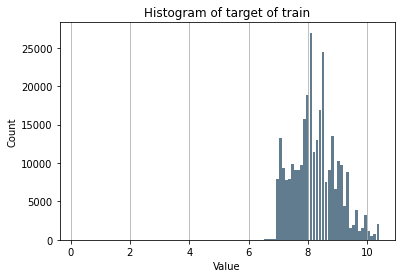

In [192]:
size, scale = 1000, 10
targets = pd.Series(train.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target of train')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

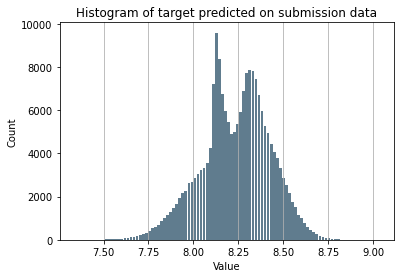

In [193]:
size, scale = 1000, 10
targets = pd.Series(submissionCombRegressor.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target predicted on submission data')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [199]:
submissionCombRegressor.target[Xgb1rf0].describe()

count    16324.000000
mean         8.315951
std          0.038466
min          8.176376
25%          8.288917
50%          8.316539
75%          8.343501
max          8.451271
Name: target, dtype: float64

In [204]:
pd.DataFrame(Both1).value_counts()[1]/2000

43.195

In [205]:
pd.DataFrame(Xgb1rf0).value_counts()[1]/2000

8.162

In [206]:
submissionCombRegressor.to_csv("submission_CombRegressorNEW.csv", index=False)

In [315]:
SUBMISSION_28 = pd.read_csv("submission_lunes_lgb_gb_lin_xgb_opt_cat_best.csv")

In [348]:
SUBMISSION_29 = pd.read_csv("submission_CombRegressorNEW.csv")

In [316]:
SUBMISSION_28.target.describe()

count    200000.000000
mean          8.242764
std           0.208996
min           7.523760
25%           8.104344
50%           8.255311
75%           8.401586
max           8.792155
Name: target, dtype: float64

In [349]:
SUBMISSION_29.target.describe()

count    200000.000000
mean          8.235763
std           0.190450
min           7.339066
25%           8.118486
50%           8.249526
75%           8.367954
max           9.035247
Name: target, dtype: float64

In [82]:
SUBMISSION_30=SUBMISSION_29
SUBMISSION_30.target=(144/145)*SUBMISSION_28.target+(1/145)*SUBMISSION_29.target

In [83]:
SUBMISSION_30.target.describe()

count    200000.000000
mean          8.242402
std           0.208631
min           7.544492
25%           8.102808
50%           8.255116
75%           8.400900
max           8.768460
Name: target, dtype: float64

In [220]:
SUBMISSION_30=SUBMISSION_29
SUBMISSION_30.target=(144/145)*SUBMISSION_28.target+(1/145)*SUBMISSION_29.target

In [221]:
SUBMISSION_30.target.describe()

count    200000.000000
mean          8.242715
std           0.208638
min           7.525700
25%           8.104605
50%           8.255286
75%           8.401159
max           8.790505
Name: target, dtype: float64

In [222]:
SUBMISSION_30.to_csv("submission_1DIV145NEW.csv", index=False)

In [223]:
SUBMISSION_30WEIGHTS=SUBMISSION_29
SUBMISSION_30WEIGHTS.target[Both0]=(28/29)*SUBMISSION_28.target[Both0]+(1/29)*SUBMISSION_29.target[Both0]
SUBMISSION_30WEIGHTS.target[Both0==False]=(144/145)*SUBMISSION_28.target[Both0==False]+(1/145)*SUBMISSION_29.target[Both0==False]
SUBMISSION_30WEIGHTS.to_csv("submission_WEIGHTS.csv", index=False)

In [224]:
SUBMISSION_30WEIGHTS.to_csv("submission_WEIGHTS.csv", index=False)

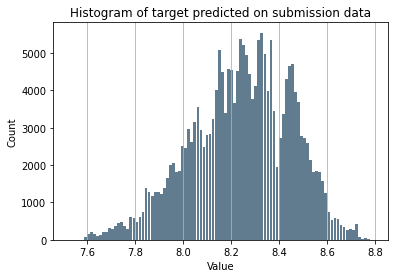

In [225]:
size, scale = 1000, 10
targets = pd.Series(SUBMISSION_30WEIGHTS.target)

targets.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of target predicted on submission data')
plt.ylabel('Count')
plt.xlabel('Value')
plt.grid(axis='y', alpha=0.75)

In [226]:
TRAIN_28 = pd.read_csv("train_pred_lin.csv")

In [332]:
SUBMISSION_28 = pd.read_csv("test_pred_lin.csv")

In [333]:
SUBMISSION_28.describe()

,id,pred_lin
count,200000.000000,200000.000000
mean,249970.884580,8.242764
std,144169.245904,0.208996
min,0.000000,7.523760
25%,125316.750000,8.104344
50%,249997.000000,8.255311
75%,374649.750000,8.401586
max,499995.000000,8.792155


In [230]:
train.target.describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

In [233]:
import math

In [240]:
TRAIN_28

,id,pred_lin
0,1,8.466351
1,25,8.284286
2,41,7.927339
3,43,8.443747
4,46,8.297786
...,...,...
299995,499959,7.737100
299996,499965,8.452177
299997,499980,8.450295
299998,499989,8.246921


In [242]:
TRAIN_28S=TRAIN_28.sort_values("id")

In [245]:
math.sqrt(mean_squared_error(train.target, TRAIN_28S.pred_lin))

0.7157904281820918

In [259]:
train.predtarget.describe()

count    300000.000000
mean          8.235426
std           0.191165
min           7.336317
25%           8.117691
50%           8.248659
75%           8.368598
max           8.962871
Name: target, dtype: float64

In [260]:
TRAIN_28S.pred_lin.describe()

count    300000.000000
mean          8.242013
std           0.209680
min           7.508347
25%           8.101708
50%           8.255321
75%           8.400098
max           8.846187
Name: pred_lin, dtype: float64

In [266]:
math.sqrt(mean_squared_error(train.target, train.predtarget))

0.0

In [267]:
train.target.describe()

count    300000.000000
mean          8.235426
std           0.191165
min           7.336317
25%           8.117691
50%           8.248659
75%           8.368598
max           8.962871
Name: target, dtype: float64

In [294]:
preds=pd.DataFrame(300000*[0])

In [295]:
preds.set_index(keys=TRAIN_28S.id)

,0
id,
1,0
2,0
3,0
4,0
6,0
...,...
499993,0
499996,0
499997,0


In [296]:
preds[Txgb0rf1]=xgb0rf1regressorbest.predict(TRAIN_features[Txgb0rf1],ntree_limit = xgb0rf1regressorbest.get_booster().best_ntree_limit)

In [292]:
pd.DataFrame(Txgb0rf1).value_counts()

False    265271
True      34729
dtype: int64

In [307]:
predsTxgb1rf0=xgb1rf0regressor.predict(TRAIN_features[Txgb1rf0],ntree_limit = xgb1rf0regressor.get_booster().best_ntree_limit)

In [308]:
predsTboth0=xgbyrf0regressor.predict(TRAIN_features[Tboth0],ntree_limit = xgbyrf0regressor.get_booster().best_ntree_limit)

In [309]:
math.sqrt(mean_squared_error(train.target[Tboth0], predsTboth0))

0.0

In [297]:
preds.describe()

,0
count,300000.000000
mean,0.943132
std,2.606615
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.592021


In [304]:
TEST_28

,id,pred_lin
0,0,8.052494
1,5,8.417856
2,15,8.439827
3,16,8.506639
4,17,8.132106
...,...,...
199995,499987,8.010654
199996,499990,8.495429
199997,499991,8.515397
199998,499994,8.189655


In [305]:
SUBMISSION_29

,id,target
0,0,7.847992
1,5,8.415618
2,15,8.494040
3,16,8.367318
4,17,8.326924
...,...,...
199995,499987,8.130135
199996,499990,8.538390
199997,499991,8.355947
199998,499994,8.105479


In [350]:
SUBMISSION_30WEIGHTS=SUBMISSION_28
SUBMISSION_30WEIGHTS.target[Both1]=(28/29)*SUBMISSION_28.target[Both1]+(1/29)*SUBMISSION_29.target[Both1]
#SUBMISSION_30WEIGHTS.target[Both0==False]=(144/145)*SUBMISSION_28.target[Both0==False]+(1/145)*SUBMISSION_29.target[Both0==False]
#SUBMISSION_30WEIGHTS.to_csv("submission_WEIGHTSNEW.csv", index=False)

In [346]:
SUBMISSION_30WEIGHTS.target

0         8.045442
1         8.417779
2         8.441696
3         8.501835
4         8.138824
            ...   
199995    8.014774
199996    8.496910
199997    8.509898
199998    8.186752
199999    7.964263
Name: target, Length: 200000, dtype: float64

In [341]:
SUBMISSION_28=SUBMISSION_28.rename(columns = {'pred_lin': 'target'}, inplace = False)

In [342]:
SUBMISSION_28

,id,target
0,0,8.052494
1,5,8.417856
2,15,8.439827
3,16,8.506639
4,17,8.132106
...,...,...
199995,499987,8.010654
199996,499990,8.495429
199997,499991,8.515397
199998,499994,8.189655


In [351]:
SUBMISSION_30WEIGHTS.to_csv("submission_WEIGHTSNEW3.csv", index=False)